## ML Lab Assignment 2

### Team Members
* Safir Motiwala (2175052)
* Rajendra Kelwa (2175048)

#### Topic : Find-S Algorithm and Candidate Elimination ALgorithm

### Building the DataSet

In [1]:
fields = ['State', 'Climate', 'Age', 'Body_Shape', 'Immune_Strength', 'Mood', 'Migrant', 'Chocolate_Lover', 'Hangout', 'Stressed', 'Depressed', 'Literate', 'Food_preference', 'Friend_Circle', 'Married', 'Sports', 'Party', 'Covid_19']
state = ['Maharashtra', 'Karnataka']
Age = ['Young', 'Old']
Immune_Strength = ['Weak', 'High']
Mood = ["Happy", 'Sad']
Migrant = ['Yes', 'No']
Chocolate_Lover = ['Yes', 'No']
Hangout = ['Sometimes', 'Often']
Stressed = ['Sometimes', 'Often']
Depressed = ['Never', 'Sometimes', 'Often']
Literate = ['Yes', 'No']
Food_preference = ['Veg', 'NonVeg']
Friend_Circle = ['Small', 'Huge']
Married = ['Yes', 'No']
Sports = ['Cricket', 'Football']
Party = ['Sometimes', 'Often']
Covid_19 = ['Yes', 'No']

import csv
import random

filename = 'Covid-19_Data.csv'
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    row = [random.choice(state), 'Sunny', random.choice(Age), 'Under-weight', random.choice(Immune_Strength), random.choice(Mood), random.choice(Migrant), random.choice(Chocolate_Lover), random.choice(Hangout), random.choice(Stressed), random.choice(Depressed), random.choice(Literate), random.choice(Food_preference), random.choice(Friend_Circle), random.choice(Married), random.choice(Sports), random.choice(Party), 'Yes']
    csvwriter.writerow(row)
    for i in range(2):
        row = [random.choice(state), 'Sunny', random.choice(Age), 'Under-weight', random.choice(Immune_Strength), random.choice(Mood), random.choice(Migrant), random.choice(Chocolate_Lover), random.choice(Hangout), random.choice(Stressed), random.choice(Depressed), random.choice(Literate), random.choice(Food_preference), random.choice(Friend_Circle), random.choice(Married), random.choice(Sports), random.choice(Party), 'No']
    csvwriter.writerow(row)
    for i in range(0, 390):
        row = [random.choice(state), 'Sunny', random.choice(Age), 'Under-weight', random.choice(Immune_Strength), random.choice(Mood), random.choice(Migrant), random.choice(Chocolate_Lover), random.choice(Hangout), random.choice(Stressed), random.choice(Depressed), random.choice(Literate), random.choice(Food_preference), random.choice(Friend_Circle), random.choice(Married), random.choice(Sports), random.choice(Party), random.choice(Covid_19)]
        csvwriter.writerow(row)
    for i in range(0,10):
        row = [random.choice(state), 'Winter', random.choice(Age), 'Over-weight', random.choice(Immune_Strength), random.choice(Mood), random.choice(Migrant), random.choice(Chocolate_Lover), random.choice(Hangout), random.choice(Stressed), random.choice(Depressed), random.choice(Literate), random.choice(Food_preference), random.choice(Friend_Circle), random.choice(Married), random.choice(Sports), random.choice(Party), random.choice(Covid_19)]
        csvwriter.writerow(row)

### Importing the Dataset and Preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Covid-19_Data.csv')

result = {'Yes':1, 'No':0}
dataset['Covid_19'] = dataset['Covid_19'].map(result)

X = dataset.iloc[:, 0:16].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
#print(kf.get_n_splits(X))

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
print(dataset.head())

         State Climate    Age    Body_Shape Immune_Strength   Mood Migrant  \
0  Maharashtra   Sunny    Old  Under-weight            High    Sad     Yes   
1    Karnataka   Sunny  Young  Under-weight            High    Sad      No   
2  Maharashtra   Sunny    Old  Under-weight            Weak  Happy     Yes   
3    Karnataka   Sunny    Old  Under-weight            Weak    Sad     Yes   
4  Maharashtra   Sunny  Young  Under-weight            High  Happy     Yes   

  Chocolate_Lover    Hangout   Stressed  Depressed Literate Food_preference  \
0             Yes  Sometimes  Sometimes      Never       No             Veg   
1             Yes  Sometimes      Often  Sometimes       No          NonVeg   
2             Yes      Often      Often  Sometimes      Yes          NonVeg   
3              No      Often  Sometimes      Often       No          NonVeg   
4              No      Often      Often  Sometimes      Yes          NonVeg   

  Friend_Circle Married    Sports      Party  Covid_19  

### Writing the Code for Find-S Algorithm

In [5]:
class FindS:
    def __init__(self):
        self.Xtrain = ""
        self.ytrain = ""
        self.Xtest = ""
        self.ytest = ""
        self.specific_hypothesis = []
    
    def fit(self, X, y):
        count = 0
        self.Xtrain, self.ytrain = X, y
        for i, val in enumerate(y):
            if val==1:
                S_hypothesis = list(X[0].copy())
                print("Initial : ", S_hypothesis)
                break
        for i, val in enumerate(X):
            if y[i]==1:
                count+=1
                for x in range(len(S_hypothesis)):
                    if val[x] == S_hypothesis[x]:
                        pass
                    else:
                        S_hypothesis[x] = '?'
        print("Total Positive Records : ", count)
        self.specific_hypothesis = S_hypothesis
        return S_hypothesis
    
    def predict(self, X):
        y = np.array([0 for i in range(len(X))])
        self.Xtest = X
        for i, val in enumerate(X):
            val = list(val)
            check = 0
            for x in range(len(val)):
                if val[x] == self.specific_hypothesis[x]:
                    check+=1
                else:
                    pass
            if check>0:
                y[i] = 1
            else:
                y[i] = 0
        self.ytest = y
        return y

### Fitting the Training Set to the Model

In [6]:
from FindSAlgorithm import FindS
fs = FindS()            
S_hypothesis = fs.fit(X_train, y_train)

Initial :  ['Maharashtra', 'Sunny', 'Old', 'Under-weight', 'High', 'Sad', 'Yes', 'Yes', 'Sometimes', 'Sometimes', 'Never', 'No', 'Veg', 'Small', 'No', 'Football']
Total Positive Records :  187


In [7]:
print("Specific Hypothesis : ", S_hypothesis)

Specific Hypothesis :  ['?', 'Sunny', '?', 'Under-weight', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


### Predicting the Test Set Results

In [8]:
y_pred = fs.predict(X_test)
y_pred1 = fs.predict(X_train)

In [9]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0]


### Finding the Average Precision Score

In [10]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score

Avg1 = average_precision_score(y_train, y_pred1, average='micro', pos_label=1)
Avg2 = average_precision_score(y_test, y_pred, average='micro', pos_label=1)

print("Average Precision Score (Training Data) : ", Avg1)
print("Average Precision Score (Test Data) : ", Avg2)

Average Precision Score (Training Data) :  0.5165745856353591
Average Precision Score (Test Data) :  0.5266666666666666


### Finding the F-1 Score

In [11]:
FS1 = f1_score(y_train, y_pred1, average='binary', pos_label=1)
FS2 = f1_score(y_test, y_pred, average='binary', pos_label=1)

print("F-1 Score (Training Data) : ", FS1)
print("F-1 Score (Test Data) : ", FS2)

F-1 Score (Training Data) :  0.6812386156648451
F-1 Score (Test Data) :  0.64


### Plotting Area Under the Curve

In [12]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Area under the Curve : ", auc)

Area under the Curve :  0.55


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.550


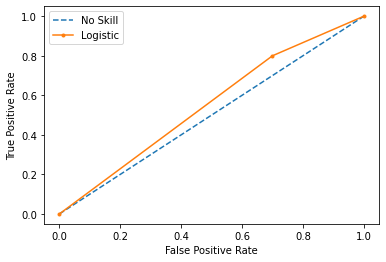

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Writing the Code for Candidate Elimination Algorithm

In [14]:
class Candidate_Elimination:
    def __init__(self):
        self.Xtrain = ""
        self.ytrain = ""
        self.Xtest = ""
        self.ytest = ""
        self.specific_hypothesis = []
        self.general_hypothesis = []
        self.version_space = []
        
    def fit(self, X, y):
        count, count1 = 0, 0
        self.Xtrain, self.ytrain = X, y
        for i, val in enumerate(y):
            if val==1:
                S_hypothesis = list(X[0].copy())
                G_hypothesis = [['?' for _ in range(len(S_hypothesis))]]
                print("Initial Specific Hypothesis : ", S_hypothesis)
                print("Initial General Hypothesis : ", G_hypothesis)
                break
        for i, val in enumerate(X):
            if y[i]==1:
                count+=1
                for x in range(len(S_hypothesis)):
                    #print(G_hypothesis)
                    if val[x] == S_hypothesis[x]:
                        pass
                    else:
                        S_hypothesis[x] = '?'
                        temp = ['?' for _ in range(len(S_hypothesis))]
                        temp[x] = val[x]
                        #print(temp)
                        if temp not in G_hypothesis:
                            pass
                        else:
                            G_hypothesis.remove(temp)
                            #print("Removed")
            elif y[i]==0:
                count1+=1
                temp = []
                for x in range(len(S_hypothesis)):
                    if val[x] != S_hypothesis[x] and S_hypothesis[x] != '?':
                        temp = ['?' for _ in range(len(S_hypothesis))]
                        temp[x] = S_hypothesis[x]
                        if temp not in G_hypothesis:
                            G_hypothesis.append(temp)
                        temp = []
                        
        if len(G_hypothesis)==1:
            v1 = [S_hypothesis]
        else:
            v1 = []
            for i in G_hypothesis:
                for j in range(len(i)):
                    if i[j] != '?':
                        h = i[j]
                        for z in range(len(S_hypothesis)):
                            if S_hypothesis[z] != '?':
                                temp = ['?' for _ in range(len(S_hypothesis))]
                                temp[z] = S_hypothesis[z]
                                temp[j] = i[j]
                                v1.append(temp)
                                
        print('Final Specific Hypothesis : ', S_hypothesis)
        print('Final General Hypothesis : ', G_hypothesis)
        print('Final Version Space : ', v1)
        print(count, " ", count1)
        self.specific_hypothesis, self.general_hypothesis = S_hypothesis, G_hypothesis
        self.version_space = v1
        return 1
    
    def predict(self, X):
        y = np.array([0 for i in range(len(X))])
        self.Xtest = X
        for i, val in enumerate(X):
            val = list(val)
            check = 0
            for x in range(len(val)):
                for z in self.version_space:
                    if val[x] == z[x]:
                        check+=1
                    else:
                        pass
            if check>0:
                y[i] = 1
            else:
                y[i] = 0
        self.ytest = y
        return y

### Fitting the Training Set to the Model

In [15]:
from CandidateEliminationAlgorithm import Candidate_Elimination
ce = Candidate_Elimination()
ce.fit(X_train, y_train)

Initial Specific Hypothesis :  ['Maharashtra', 'Sunny', 'Old', 'Under-weight', 'High', 'Sad', 'Yes', 'Yes', 'Sometimes', 'Sometimes', 'Never', 'No', 'Veg', 'Small', 'No', 'Football']
Initial General Hypothesis :  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
Final Specific Hypothesis :  ['?', 'Sunny', '?', 'Under-weight', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
Final General Hypothesis :  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
Final Version Space :  [['?', 'Sunny', '?', 'Under-weight', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
187   175


1

### Predicting the Test Set Results

In [16]:
y_pred = ce.predict(X_test)
y_pred1 = ce.predict(X_train)

In [17]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0]


### Finding the Average Precision Score

In [17]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score

Avg1 = average_precision_score(y_train, y_pred1, average='micro', pos_label=1)
Avg2 = average_precision_score(y_test, y_pred, average='micro', pos_label=1)

print("Average Precision Score (Training Data) : ", Avg1)
print("Average Precision Score (Test Data) : ", Avg2)

Average Precision Score (Training Data) :  0.5165745856353591
Average Precision Score (Test Data) :  0.5266666666666666


### Finding the F-1 Score

In [18]:
FS1 = f1_score(y_train, y_pred1, average='binary', pos_label=1)
FS2 = f1_score(y_test, y_pred, average='binary', pos_label=1)

print("F-1 Score (Training Data) : ", FS1)
print("F-1 Score (Test Data) : ", FS2)

F-1 Score (Training Data) :  0.6812386156648451
F-1 Score (Test Data) :  0.64


### Plotting the Area Under the Curve

In [19]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("Area under the Curve : ", auc)

Area under the Curve :  0.55


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.550


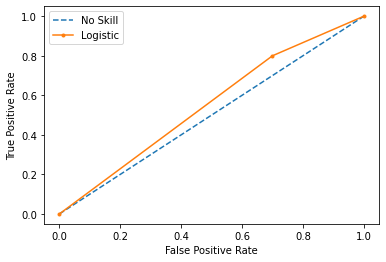

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Full Code at : 
#### https://github.com/safir72347/MIT-Machine-Learning/tree/master/Find-S_Algorithm
#### https://github.com/safir72347/MIT-Machine-Learning/tree/master/Candidate-Elimination_Algorithm